## Car Price Prediction







In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [3]:
df=pd.read_csv('Cardetails.csv')

#Data Preprocessiong

df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [4]:
#Describes descriptive statistics
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [5]:
#Checks for num value in DataFrame
print(df.isnull().sum())

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64


In [6]:
#Shape of dataframe in row x column
df.shape

(8128, 13)

In [7]:
#Mileage,Engine,max_power Consist of string values and integer value
#Converting this value to int value by removing string

df['mileage']=df['mileage'].str.split(' ').str[0]
df['engine']=df['engine'].str.split(' ').str[0]
df['max_power']=df['max_power'].str.split(' ').str[0]
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4,1248,74,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7,1497,78,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0,1396,90,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1,1298,88.2,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5,1197,82.85,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8,1493,110,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3,1248,73.9,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396,70,140Nm@ 1800-3000rpm,5.0


In [8]:
#torque donot hold significant meaning because its range are different
df=df.drop(columns=['torque'])
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4,1248,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7,1497,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0,1396,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1,1298,88.2,5.0


In [9]:
#Converting string value to float
df['mileage']=df['mileage'].astype(float)
df['engine']=df['engine'].astype(float)

In [10]:
# Handling missing values
df['mileage']=df['mileage'].fillna(df['mileage'].mean())
df['engine']=df['engine'].fillna(df['engine'].mean())
df['max_power']=df['max_power'].fillna(df['max_power'].mode()[0])
df['seats']=df['seats'].fillna(df['seats'].mean())

In [11]:
#Checks for null value
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
dtype: int64

In [12]:
print(df.duplicated().sum())

1202


In [13]:
#removing duplicates value
df=df.drop_duplicates()
print(df.duplicated().sum())

0


In [14]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8121,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.90,998.0,67.1,5.0
8122,Hyundai i20 Magna 1.4 CRDi,2014,475000,80000,Diesel,Individual,Manual,Second Owner,22.54,1396.0,88.73,5.0
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110,5.0


In [15]:

#Label Encoding for categorical datas
print(df['transmission'].unique())
Encode=LabelEncoder()
df['fuel']=Encode.fit_transform(df['fuel']) #0-CNG 1-Diesel 2-LPG 3-Petrol
df['seller_type']=Encode.fit_transform(df['seller_type']) #0-Dealer 1-Individual 2-Trustmark Dealer
df['owner']=Encode.fit_transform(df['owner']) #0-First 1-Fourth and above 2-Second 3-Test Drive car 4-Third
df['transmission']=Encode.fit_transform(df['transmission']) #0-automatic 1-Manual

['Manual' 'Automatic']


In [16]:
df['name']=df['name'].str.split(' ').str[0]
df['name'].unique()



array(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Fiat', 'Datsun', 'Jeep',
       'Mercedes-Benz', 'Mitsubishi', 'Audi', 'Volkswagen', 'BMW',
       'Nissan', 'Lexus', 'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo',
       'Kia', 'Force', 'Ambassador', 'Ashok', 'Isuzu', 'Opel', 'Peugeot'],
      dtype=object)

## Data Visualization

<Axes: xlabel='fuel'>

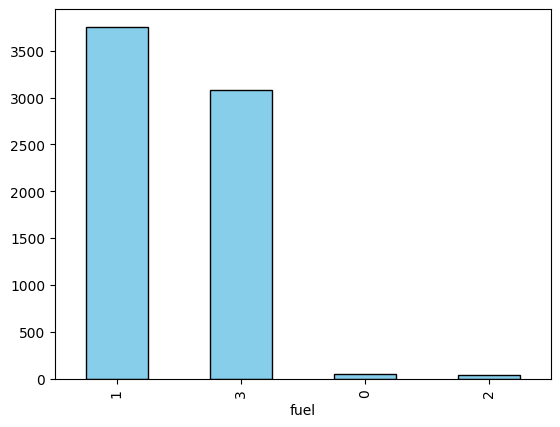

In [17]:
df['fuel'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')

1-Diesel- Most used fuel
3-Petrol- Second most used fuel

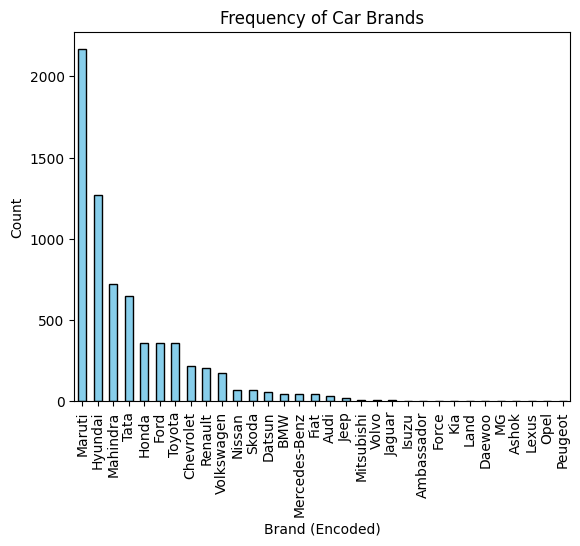

In [18]:
df['name'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Frequency of Car Brands')
plt.xlabel('Brand (Encoded)')
plt.ylabel('Count')
plt.show()

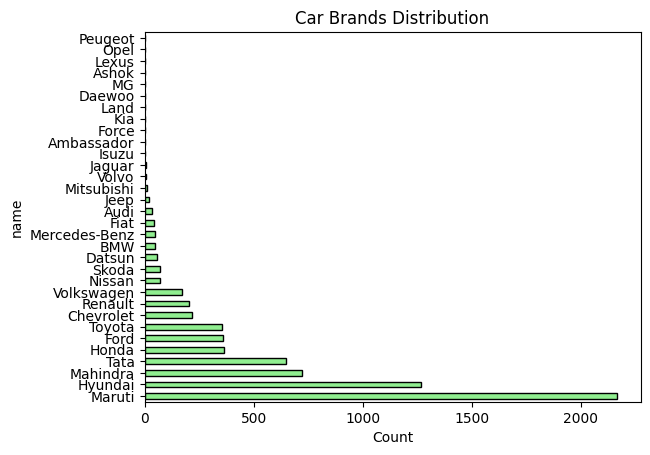

In [19]:
df['name'].value_counts().plot(kind='barh', color='lightgreen', edgecolor='black')
plt.title('Car Brands Distribution')
plt.xlabel('Count')
plt.show()

Count of maruti car is comparatively higher


<Axes: xlabel='year'>

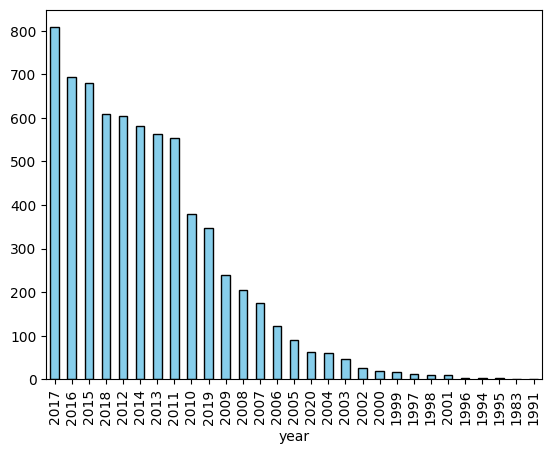

In [20]:
df['year'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')

2017 is the year with more no of car count

<class 'pandas.core.frame.DataFrame'>
Index: 6926 entries, 0 to 8125
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6926 non-null   object 
 1   year           6926 non-null   int64  
 2   selling_price  6926 non-null   int64  
 3   km_driven      6926 non-null   int64  
 4   fuel           6926 non-null   int64  
 5   seller_type    6926 non-null   int64  
 6   transmission   6926 non-null   int64  
 7   owner          6926 non-null   int64  
 8   mileage        6926 non-null   float64
 9   engine         6926 non-null   float64
 10  max_power      6925 non-null   float64
 11  seats          6926 non-null   float64
dtypes: float64(4), int64(7), object(1)
memory usage: 703.4+ KB


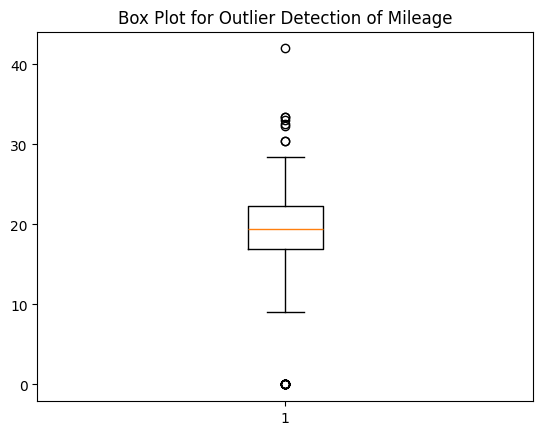

In [21]:


#convert max power to float
df['mileage'] = pd.to_numeric(df['mileage'], errors='coerce')
df['max_power'] = pd.to_numeric(df['max_power'], errors='coerce')
df.info()

# detect outlier in dataset

plt.boxplot(df['mileage'])
plt.title("Box Plot for Outlier Detection of Mileage")
plt.show()

In [22]:
Q1 = df['mileage'].quantile(0.25)
Q3 = df['mileage'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

anomalies = df[(df['mileage'] < lower_bound) | (df['mileage'] > upper_bound)]
print("Anomalies using IQR:\n", anomalies.groupby('name')['mileage'].count())

#handle outlier
df = df[(df['mileage'] > lower_bound) & (df['mileage'] < upper_bound)]

Anomalies using IQR:
 name
Hyundai          7
Land             1
Mahindra         2
Maruti           7
Mercedes-Benz    2
Tata             1
Volkswagen       2
Volvo            1
Name: mileage, dtype: int64


In [30]:
sns.displot(df['selling_price'], color='skyblue')
sns.displot(df['selling_price'], color='skyblue')

ValueError: The following variable cannot be assigned with wide-form data: `hue`

In [24]:
brand_mapping = {
    'Maruti': 0, 'Skoda': 1, 'Honda': 2, 'Hyundai': 3, 'Toyota': 4, 'Ford': 5,
    'Renault': 6, 'Mahindra': 7, 'Tata': 8, 'Chevrolet': 9, 'Fiat': 10,
    'Datsun': 11, 'Jeep': 12, 'Mercedes-Benz': 13, 'Mitsubishi': 14, 
    'Audi': 15, 'Volkswagen': 16, 'BMW': 17, 'Nissan': 18, 'Lexus': 19,
    'Jaguar': 20, 'Land': 21, 'MG': 22, 'Volvo': 23, 'Daewoo': 24, 
    'Kia': 25, 'Force': 26, 'Ambassador': 27, 'Ashok': 28, 'Isuzu': 29,
    'Opel': 30, 'Peugeot': 31
}
df['name'] = df['name'].replace(brand_mapping)

print(df.head())

   name  year  selling_price  km_driven  fuel  seller_type  transmission  \
0     0  2014         450000     145500     1            1             1   
1     1  2014         370000     120000     1            1             1   
2     2  2006         158000     140000     3            1             1   
3     3  2010         225000     127000     1            1             1   
4     0  2007         130000     120000     3            1             1   

   owner  mileage  engine  max_power  seats  
0      0    23.40  1248.0      74.00    5.0  
1      2    21.14  1498.0     103.52    5.0  
2      4    17.70  1497.0      78.00    5.0  
3      0    23.00  1396.0      90.00    5.0  
4      0    16.10  1298.0      88.20    5.0  


/tmp/ipykernel_2834/207888436.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['name'] = df['name'].replace(brand_mapping)
/tmp/ipykernel_2834/207888436.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['name'] = df['name'].replace(brand_mapping)


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6903 entries, 0 to 8125
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6903 non-null   int64  
 1   year           6903 non-null   int64  
 2   selling_price  6903 non-null   int64  
 3   km_driven      6903 non-null   int64  
 4   fuel           6903 non-null   int64  
 5   seller_type    6903 non-null   int64  
 6   transmission   6903 non-null   int64  
 7   owner          6903 non-null   int64  
 8   mileage        6903 non-null   float64
 9   engine         6903 non-null   float64
 10  max_power      6902 non-null   float64
 11  seats          6903 non-null   float64
dtypes: float64(4), int64(8)
memory usage: 701.1 KB


In [26]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,0,2014,450000,145500,1,1,1,0,23.40,1248.0,74.00,5.0
1,1,2014,370000,120000,1,1,1,2,21.14,1498.0,103.52,5.0
2,2,2006,158000,140000,3,1,1,4,17.70,1497.0,78.00,5.0
3,3,2010,225000,127000,1,1,1,0,23.00,1396.0,90.00,5.0
4,0,2007,130000,120000,3,1,1,0,16.10,1298.0,88.20,5.0
